<a href="https://colab.research.google.com/github/PhilippeGithub/mldm_fs23/blob/main/labs/L04_Polynomial_and_Logistic_Regression_LAB_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [69]:
RANDOM_SEED = 0x0

# TASK 1: Polynomial Regression (5 Points): 

Let's create and explore the data.

In [70]:
# set the random seed to an RANDOM_SEED, so that everyone has the same data to work with
np.random.seed(seed=RANDOM_SEED)
# create predictor variable, that have standard normal distribution and reshape it in order to use for the model training
x = np.random.normal(0, 1, 100).reshape(-1, 1)
# create target variable
y = 3*x**3 + 2*x**2 + x + np.random.normal(0, 10, 100).reshape(-1, 1)

Visualise the data

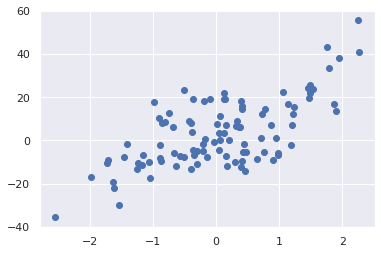

In [71]:
plt.scatter(x, y)
plt.show()

## Task 1a
Apply Linear Regression on the data


1. Split the data in the train and test set (80/20), set `random_state` to `RANDOM_SEED`.

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_SEED)

2. Apply Linear Regression on the data and predict `y` values for training as well test data 

In [73]:
from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(X_train, y_train)
X_train_predict = LR.predict(X_train)
X_test_predict = LR.predict(X_test)

3. Calculate MSE for training as well as for test data.

In [74]:
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, X_train_predict)
mse_test = mean_squared_error(y_test, X_test_predict)

print(f"MSE of training data: {mse_train}")
print(f"MSE of test data: {mse_test}")

MSE of training data: 131.3354142667106
MSE of test data: 135.783818600193


4. Visualize the model's artefacts: Plot all the data as well as Linear Regression predictions for training and test data in a scatter plot. Don't forget a legend to differentiate the data.

In [75]:
def plot_artefacts(x_train, y_predict_train, y_true_train, x_test, y_predict_test, y_true_test, labels, figure):
    plt.figure(figure)
    plt.scatter(x_train, y_predict_train, label=labels[0])
    plt.scatter(x_test, y_predict_test, label=labels[2])
    plt.scatter(x_train, y_true_train, label=labels[1])
    plt.scatter(x_test, y_true_test, label=labels[3])
    plt.legend()
    plt.show()

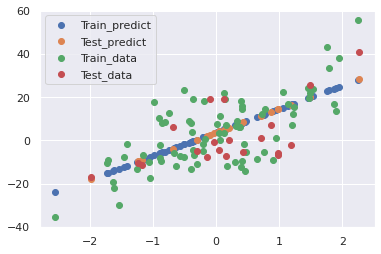

In [76]:
plot_artefacts(X_train, X_train_predict, y_train, X_test, X_test_predict, y_test, ["Train_predict", "Train_data", "Test_predict", "Test_data"], 1)

## Task 1b
Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the training and test data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [77]:
from sklearn.preprocessing import PolynomialFeatures

def poly_regression(X_train, y_train, X_test, y_test, poly_degree):
    #transform data to distibution degree
    poly = PolynomialFeatures(degree=poly_degree)
    x_poly_train = poly.fit_transform(X_train, y_train)
    x_poly_test = poly.fit_transform(X_test, y_test)

    #train a Linear Regression on polynomial data
    LR = LinearRegression()
    LR.fit(x_poly_train, y_train)

    #make predictions for training data
    y_pred_train_poly = LR.predict(x_poly_train)

    #make predictions for test data
    y_pred_test_poly = LR.predict(x_poly_test)

    #calculate MSE for training and test data
    mse_train_poly = mean_squared_error(y_train, y_pred_train_poly)
    mse_test_poly = mean_squared_error(y_test, y_pred_test_poly)

    return y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly
    #return

In [78]:
#poly_regression(X_train, y_train, X_test, y_test, 2)
y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(X_train, y_train, X_test, y_test, 2)
print(f"MSE of training data: {mse_train_poly}")
print(f"MSE of test data: {mse_test_poly}")

MSE of training data: 129.64199704420645
MSE of test data: 128.69895330783692


6. Did it perform better than Linear Regression? Visualize the results similar to **Task 1a) 4**.

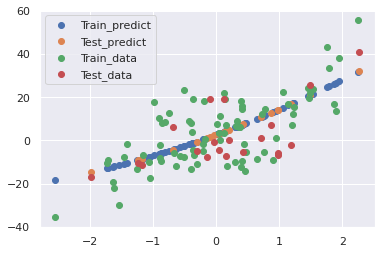

In [79]:
plot_artefacts(X_train, y_pred_train_poly, y_train, X_test, y_pred_test_poly, y_test, ["Train_predict", "Train_data", "Test_predict", "Test_data"], 2)

## Task 1c
Investigate the influence of polynomial degrees on the results. Consider degrees in `range(0, 11)`. Visualize the results similar to **Task 1a) 4** and plot MSE (on training as well as test data) as a function of the number of the polynomial degrees. 

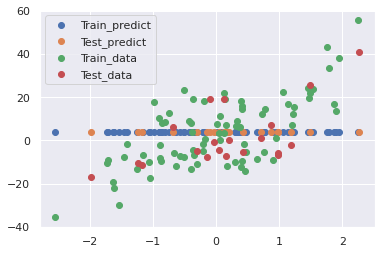

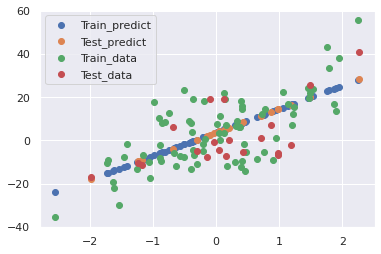

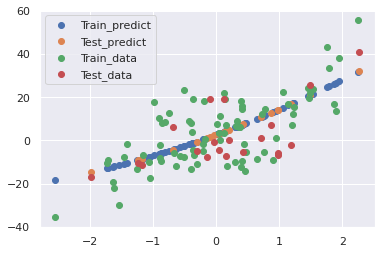

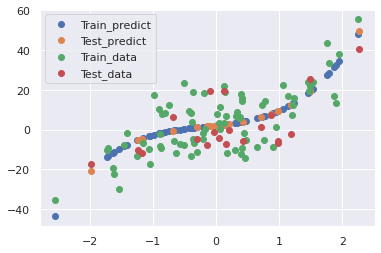

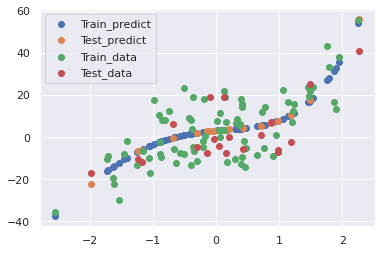

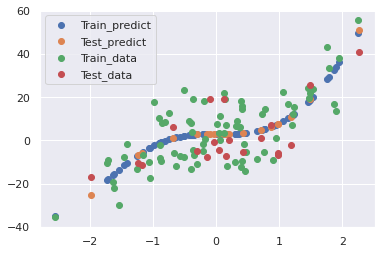

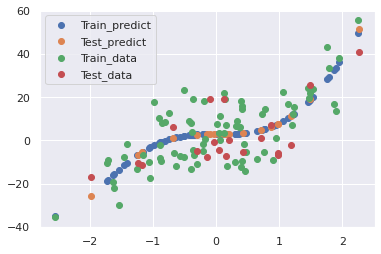

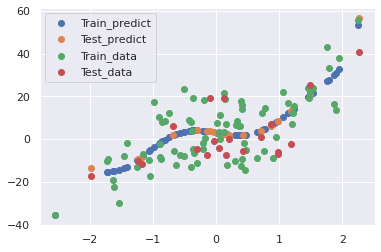

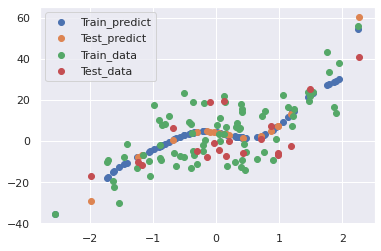

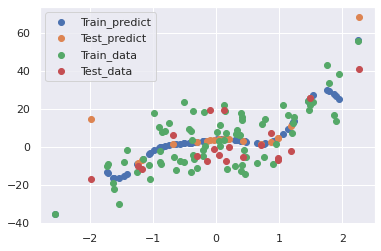

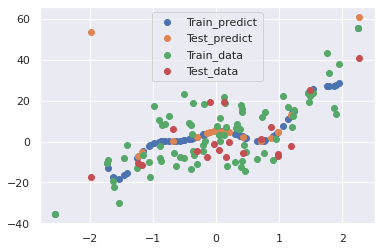

[199.3464641016471, 135.783818600193, 128.69895330783692, 96.96794313055902, 99.05556112804413, 91.46352858855067, 92.61877394619219, 98.94463376893547, 109.66001112184361, 161.3864374036761, 349.28088837491225]
[252.5590649070403, 131.3354142667106, 129.64199704420645, 107.95218526581712, 105.67902403745693, 104.44086502216433, 104.43485364972109, 102.12974684477724, 100.93920532650182, 97.08026571205133, 95.86017297350303]


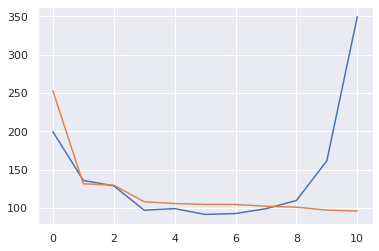

In [80]:
mses_test_poly = []
mses_train_poly = []

for degree in range(0, 11):
  y_pred_train_poly, y_pred_test_poly, mse_train_poly, mse_test_poly = poly_regression(X_train, y_train, X_test, y_test, degree)
  mses_test_poly.append(mse_test_poly)
  mses_train_poly.append(mse_train_poly)
  plot_artefacts(X_train, y_pred_train_poly, y_train, X_test, y_pred_test_poly, y_test, ["Train_predict", "Train_data", "Test_predict", "Test_data"], degree+3)

plt.figure()
plt.plot(range(0, 11), mses_test_poly)
plt.plot(range(0, 11), mses_train_poly)

print(mses_test_poly)
print(mses_train_poly)

## 📢 **HAND-IN** 📢: Answer following questions in Moodle:

What is the optimal value of the polynomial degrees? Do the values of MSE training and MSE test behave similarly? How do the models behave with polynomial degrees >= 8? 

# Task 2: Polynomial Data Transformation (1 Point)

As we have seen in the lecture, Polynomial Regression is nothing other than a generalization of Linear Regression. Every polynomial Regression can be expressed as a Multivariate Linear Regression. Only transformation of the initial data has to be done.

 $h_\theta(a) = \theta_0 + \theta_1a_1 +\theta_2a_2 $, where
 $ a_0 = v^0, a_1 = v^1, a_2 = v^2 $

In Task 1 `sklearn.preprocessing.PolynomialFeatures` transformed the X data for us. But in order to understand what exactly it is done to the data, in this task we transform an initial data array $v$ to 
the form $(a_1...a_n)$ that can be used to build a Polynomial Regression model with polynomial degrees=2 by hand (without using `sklearn.preprocessing.PolynomialFeatures`). Please transform the array $v$ and insert your answer in Moodle.

\begin{align}
v=
\begin{bmatrix}
3 \\
2 \\
0 \\
\end{bmatrix}
\end{align}

## 📢 **HAND-IN** 📢: Write your answer in Moodle

# Task 3: Logistic Regression (4 Points)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
import seaborn as sns
sns.set()

## Task 3a. Data Exploration and Preprocessing

We are using the Fashion MNIST Dataset from Zalando. 
Firstly, we load and explore the dataset.



In [82]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_train.dtype)
print(y_train.dtype)

(60000, 28, 28)
(60000,)
uint8
uint8


In [83]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In following task we will only use training part of the dataset.

#### Prepare data 
1. assign following datatypes to the arrays:
   - X_train -> 'float32'
   - y_train -> 'int64'
2. reshape X_train to 2-dimensional array. 
Note: 
   - it should have the same amount of samples/rows.
3. split the training data into (X_train, y_train) and (X_valid, y_valid), set the size of the validation dataset to 20% of the training data and set random state = 42.

In [84]:
#1
X_train = np.array(X_train, dtype='float32')
y_train = np.array(y_train, dtype='int64')
print(X_train.dtype)
print(y_train.dtype)
#2
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
print(X_train.shape)
#3
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

float32
int64
(60000, 784)
X_train:  (48000, 784)
y_train:  (48000,)
X_valid:  (12000, 784)
y_valid:  (12000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


#### Visualize some data 
Plot 25 images (hint: use ``imshow`` and ``subplots`` from matplotlib library), plot the label as title (e.g. shorts).

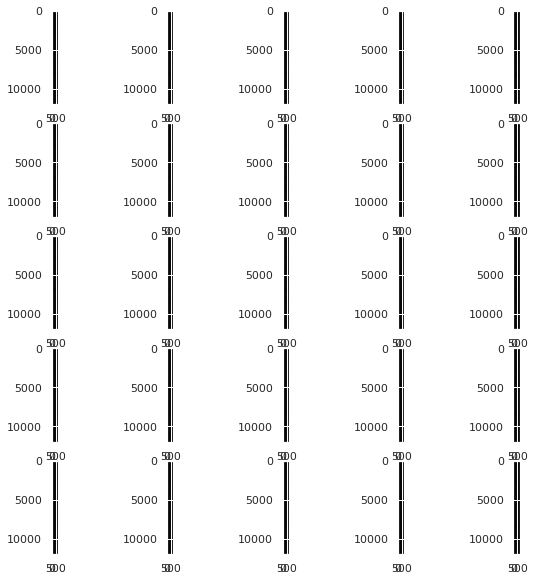

In [85]:
plt.figure(figsize=(10,10))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(X_valid, cmap = "gray", interpolation = 'BICUBIC')

#### Normalize the Images
With mean and standard deviation

In [86]:
...

Ellipsis

## Task 3b. Logistic Regression
1. Fit the `LogisticRegression` from `scikit-learn`. Set the `random_state` for reproducibility.
2. Try different parameters (either by hand or by using `GridSearchCV`)


**Accuracy should be >= 0.84**

Please, check the documentation on:
GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

PredefinedSplit: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html

You can ignore a warning "STOP: TOTAL NO. of ITERATIONS REACHED LIMIT." as long as GridSearchCV continues with the next hyperparameter and you reach the necessary accuracy.

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.linear_model import LogisticRegression
# We use predefined split in order to control that no train samples would be used in validation step

train_indices = np.full((X_train.shape[0],), -1, dtype=int)
test_indices = np.full((X_valid.shape[0],), 0, dtype=int)

ps = PredefinedSplit(np.append(train_indices, test_indices))

#found out 0.6 is best param with np.linspace(0.1, 1.0, 10)
params = {'C': [0.6]}

clf = LogisticRegression(random_state=42)
opt = GridSearchCV(clf, params, cv=ps, n_jobs = -1, verbose = 0, refit = False)

# when we fit the model, we should use both training and validation samples
opt.fit(np.append(X_train, X_valid, axis=0), np.append(y_train, y_valid, axis=0))
print(opt.best_params_)

{'C': 0.6}


Use the best found parameters for the next steps. `GridSearchCV` provides them in the `best_params_` attribute.

3. Create a new `LogisticRegression` instance with the best found parameters.
4. Fit it on the training set.
5. Calculate the accuracy on the validation set.

In [106]:
from sklearn.metrics import accuracy_score

clf.set_params(**opt.best_params_)
clf.fit(X_train, y_train)
print(clf.score(X_valid, y_valid))


0.8494166666666667


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 📢 **HAND-IN** 📢: Report in Moodle the accuracy you got in this task.